In [1]:
# Import important libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# File paths
file_path1 = 'averagerating training dataset.csv' 
file_path2 = 'averagerating testing dataset.csv'

# Check existing files
if not os.path.exists(file_path1):
    raise FileNotFoundError(f"File not found: {file_path1}")
if not os.path.exists(file_path2):
    raise FileNotFoundError(f"File not found: {file_path2}")

# Reading the data from file CSV
data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)

In [2]:
def process_data(data, target_column):
    """
Data Processing:
- Check for the existence of the target column.
- Separate feature and label.
- Filter numeric columns.
- Handle missing values ​​in numeric columns.

Args:
data (pd.DataFrame): Input data.
target_column (str): Target column name (label).

Returns:
X (pd.DataFrame): Filtered feature (only contains numeric columns).
y (pd.Series): Label (target column).
    """
    # Make sure the target column exists
    if target_column in data.columns:
        # Separate features and labels
        X = data.drop(columns=[target_column])
        y = data[target_column]
    else:
        raise ValueError(f"Column '{target_column}' không tồn tại trong dữ liệu.")

    # Select numeric columns as input
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

    # Filter data to contain only numeric columns
    X = X[numerical_features]

    # Show selected columns
    print("Selected numerical features:\n", list(numerical_features))
    
    return X, y

# Apply data processing to each file
target_column = 'averageRating'
print("Processing Training Data:")
X_train, y_train = process_data(data1, target_column)

print("\nProcessing Test Data:")
X_test, y_test = process_data(data2, target_column)


Processing Training Data:
Selected numerical features:
 ['startYear', 'runtimeMinutes', 'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount', 'titleTypeEncoded', 'genresEncoded', 'countryEncoded']

Processing Test Data:
Selected numerical features:
 ['startYear', 'runtimeMinutes', 'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount', 'genresEncoded', 'titleTypeEncoded', 'countryEncoded']


In [5]:
# Kiểm tra cột trong tập huấn luyện và kiểm tra
print("Columns in Training Set:", X_train.columns.tolist())
print("Columns in Testing Set:", X_test.columns.tolist())


Columns in Training Set: ['startYear', 'runtimeMinutes', 'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount', 'titleTypeEncoded', 'genresEncoded', 'countryEncoded']
Columns in Testing Set: ['startYear', 'runtimeMinutes', 'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount', 'genresEncoded', 'titleTypeEncoded', 'countryEncoded']


In [7]:
# Đảm bảo X_test có cùng cột và thứ tự với X_train
X_test = X_test[X_train.columns]


In [9]:
# Kiểm tra cột trong tập huấn luyện và kiểm tra
print("Columns in Training Set:", X_train.columns.tolist())
print("Columns in Testing Set:", X_test.columns.tolist())


Columns in Training Set: ['startYear', 'runtimeMinutes', 'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount', 'titleTypeEncoded', 'genresEncoded', 'countryEncoded']
Columns in Testing Set: ['startYear', 'runtimeMinutes', 'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount', 'titleTypeEncoded', 'genresEncoded', 'countryEncoded']


In [11]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Load datasets
file_path1 = 'averagerating training dataset.csv'
file_path2 = 'averagerating testing dataset.csv'

data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)

# Process data
def process_data(data, target_column):
    """
    Processes the dataset by separating features and target and filtering numeric columns.

    Args:
        data (pd.DataFrame): The dataset to process.
        target_column (str): The name of the target column.

    Returns:
        X (pd.DataFrame): Processed numeric features.
        y (pd.Series): Target column.
    """
    if target_column not in data.columns:
        raise ValueError(f"Column '{target_column}' not found.")
    # Tách đặc trưng và nhãn
    X = data.drop(columns=[target_column])
    y = data[target_column]
    # Chỉ giữ lại các cột số
    X = X.select_dtypes(include=['float64', 'int64'])
    return X, y

# Chuẩn bị dữ liệu
target_column = 'averageRating'
X_train, y_train = process_data(data1, target_column)
X_test, y_test = process_data(data2, target_column)

# Discretize averageRating
bins = [0.5, 3.5, 6.5, 10]
labels = ['Low', 'Medium', 'High']

def discretize_average_rating(y, bins, labels):
    """
    Discretize averageRating into categories.

    Args:
        y (pd.Series): Target values.
        bins (list): Bin edges.
        labels (list): Labels for the bins.

    Returns:
        y_discretized (pd.Series): Discretized target values.
    """
    if isinstance(y, pd.Series):
        y = y.to_numpy()
    discretizer = KBinsDiscretizer(n_bins=len(bins)-1, encode='ordinal', strategy='uniform')
    y_discretized = discretizer.fit_transform(y.reshape(-1, 1)).flatten()
    y_discretized = pd.Series(y_discretized).map(dict(enumerate(labels)))
    return y_discretized

y_train_discretized = discretize_average_rating(y_train, bins, labels)
y_test_discretized = discretize_average_rating(y_test, bins, labels)

# Ensure X_test matches X_train
missing_cols = set(X_train.columns) - set(X_test.columns)
if missing_cols:
    print(f"Warning: Missing columns in X_test: {missing_cols}")
    for col in missing_cols:
        X_test[col] = 0

# Sắp xếp lại thứ tự cột
X_test = X_test[X_train.columns]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define GridSearchCV parameters and train KNN
param_grid = {
    'n_neighbors': range(1, 51, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

def knn_grid_search(X, y, param_grid, cv=5, scoring='accuracy'):
    """
    Perform GridSearchCV for KNN to find the best parameters.

    Args:
        X (np.ndarray): Features.
        y (pd.Series): Target values.
        param_grid (dict): Grid search parameters.
        cv (int): Number of cross-validation folds.
        scoring (str): Scoring metric.

    Returns:
        best_knn (KNeighborsClassifier): The best KNN model.
        best_params (dict): Best parameters from the grid search.
    """
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring=scoring, verbose=1, n_jobs=-1)
    grid_search.fit(X, y)
    print(f"Best params: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_:.4f}")
    return grid_search.best_estimator_, grid_search.best_params_

best_knn, best_params = knn_grid_search(X_train_scaled, y_train_discretized, param_grid)

# Evaluate on test set
y_pred = best_knn.predict(X_test_scaled)
print("\nClassification Report:\n", classification_report(y_test_discretized, y_pred))
print(f"Test Accuracy: {accuracy_score(y_test_discretized, y_pred):.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\manht\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [0.68873173 0.68873173 0.72298882 0.71840858 0.73647834 0.73760763
 0.74394482 0.74526232 0.74909009 0.75097197 0.74915275 0.75147393
 0.75009372 0.75191312 0.75379553 0.75630514 0.75636831 0.75787409
 0.75680763 0.75975662 0.75473711 0.75869022 0.75448603 0.75825062
 0.75530167 0.75912919 0.75448605 0.75868991 0.75555267 0.75931728
 0.75548988 0.75793696 0.75599188 0.75931736 0.75536443 0.75793681
 0.75517616 0.75693293 0.75448609 0.75743485 0.75549019 0.7574977
 0.75517657 0.75730965 0.7534827  0.75655681 0.75417279 0.7563687
 0.75517673 0.75712154        nan 0.70021313        nan 0.72593816
        nan 0.74312912        nan 0.74745848        nan 0.75197566
        nan 0.75511313        nan 0.75875217        nan 0.76075997
        nan 0.76069728        nan 0.76201505        nan 0.76138776
        nan 0.76163892        nan 0.7621406         na

Best params: {'metric': 'manhattan', 'n_neighbors': 47, 'weights': 'distance'}
Best score: 0.7630


C:\Users\manht\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\manht\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\manht\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manht\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\manht\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro


Classification Report:
               precision    recall  f1-score   support

        High       0.79      0.92      0.85      3819
         Low       0.00      0.00      0.00        69
      Medium       0.64      0.38      0.48      1425

    accuracy                           0.77      5313
   macro avg       0.48      0.44      0.44      5313
weighted avg       0.74      0.77      0.74      5313

Test Accuracy: 0.7666


C:\Users\manht\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manht\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manht\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


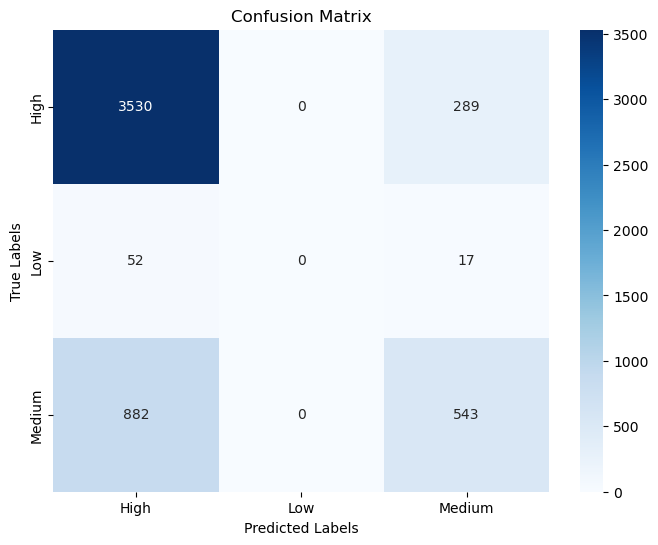

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test_discretized, y_pred, labels=best_knn.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


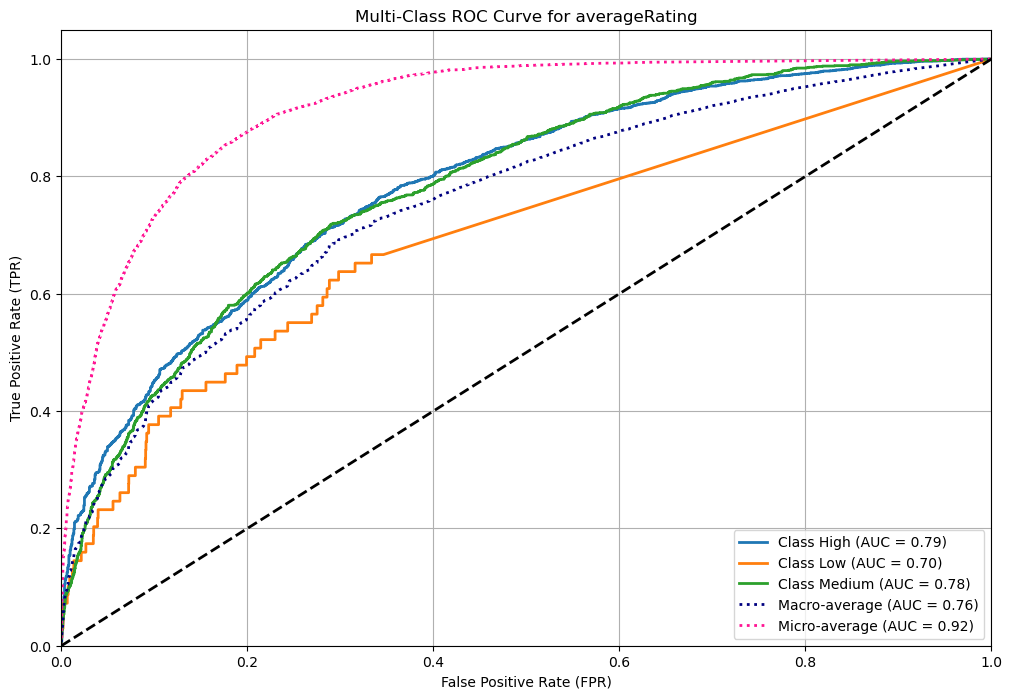

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Ensure that `y_test_discretized` is used instead of `y_test` for discretized labels
classes = best_knn.classes_
y_test_bin = label_binarize(y_test_discretized, classes=classes)
y_pred_prob = best_knn.predict_proba(X_test_scaled)  # Predicted probabilities from scaled test data

# Prepare variables for macro-average ROC and micro-average ROC
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC Curve and AUC for each class
for i, class_label in enumerate(classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Compute macro-average ROC and AUC
all_fpr = np.unique(np.concatenate([fpr[class_label] for class_label in classes]))
mean_tpr = np.zeros_like(all_fpr)
for class_label in classes:
    mean_tpr += np.interp(all_fpr, fpr[class_label], tpr[class_label])
mean_tpr /= len(classes)
macro_fpr = all_fpr
macro_tpr = mean_tpr
macro_auc = auc(macro_fpr, macro_tpr)

# Compute micro-average ROC and AUC
micro_fpr, micro_tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
micro_auc = auc(micro_fpr, micro_tpr)

# Plot all ROC Curves
plt.figure(figsize=(12, 8))

# Individual class ROC Curves
for i, class_label in enumerate(classes):
    plt.plot(fpr[class_label], tpr[class_label], lw=2, label=f"Class {class_label} (AUC = {roc_auc[class_label]:.2f})")

# Macro-average ROC Curve
plt.plot(macro_fpr, macro_tpr, color='navy', linestyle=':', linewidth=2, label=f"Macro-average (AUC = {macro_auc:.2f})")

# Micro-average ROC Curve
plt.plot(micro_fpr, micro_tpr, color='deeppink', linestyle=':', linewidth=2, label=f"Micro-average (AUC = {micro_auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Multi-Class ROC Curve for averageRating')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [17]:
# Count the number of occurrences for each label in the training dataset
label_counts = y_train_discretized.value_counts()

# Print the label counts
print("Label counts in training dataset:")
print(label_counts)


Label counts in training dataset:
High      11456
Medium     4270
Low         212
Name: count, dtype: int64
